http://neuralnetworksanddeeplearning.com/chap1.html

In [6]:
import sys
import os
sys.path.append("../")
from utils.network import Network

https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.5489466 , -0.4870366 ,  0.11849323,  0.89438665,  0.38921127,
         0.01002564, -0.440604  , -0.62819564, -0.55585665,  0.3030643 ]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.15045191, 0.05339197, 0.09782597, 0.21253009, 0.1282406 ,
        0.08777025, 0.05592956, 0.04636298, 0.04984112, 0.11765555]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.4330328

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3019 - accuracy: 0.9121
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1411 - accuracy: 0.9581
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1066 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0865 - accuracy: 0.9732
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0742 - accuracy: 0.9766s - l


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0702 - accuracy: 0.9777


[0.07022402419541031, 0.9777]

In [11]:
element = 115
preds = model.predict(x_test)
print(np.argmax(preds[element]))
print(y_test[element])

9
4


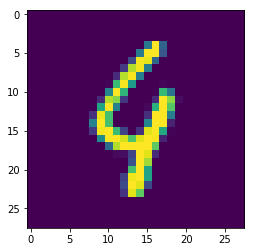

In [12]:
batch = x_test
plotData = batch[element]
plotData = plotData.reshape(28, 28)
plt.imshow(plotData)
plt.show()

In [13]:
predicted_vals = []
for pred in preds:
    predicted_vals.append(np.argmax(pred))
predicted_vals = np.array(predicted_vals)

In [14]:
# eval_preds = y_test == predicted_vals
# for i in range(len(eval_preds)):
#     if eval_preds[i] != True:
#         print(i)

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.00583833e-07, 2.55364085e-09, 1.84251203e-05, 8.43480302e-05,
        2.33068512e-12, 2.20216236e-08, 2.64727849e-14, 9.99891162e-01,
        1.63089931e-06, 4.28569956e-06],
       [2.12492651e-07, 1.73953682e-04, 9.99787867e-01, 3.60725280e-05,
        5.07639551e-14, 1.36339423e-07, 8.49680077e-08, 2.16732434e-13,
        1.71402507e-06, 1.36399041e-12],
       [5.22405230e-07, 9.99325514e-01, 1.74917688e-04, 1.29841401e-05,
        9.17142279e-06, 1.11547834e-05, 2.01563689e-05, 2.73760437e-04,
        1.71699125e-04, 6.71519800e-08],
       [9.99972463e-01, 4.40560227e-11, 1.79218678e-05, 1.18479456e-07,
        4.98083852e-10, 2.26845373e-06, 1.59949263e-06, 4.22592095e-08,
        1.11825509e-08, 5.57101839e-06],
       [5.06014294e-06, 9.69029967e-10, 1.95834982e-05, 1.56930167e-08,
        9.94560659e-01, 1.28130637e-07, 2.35287430e-07, 2.70910416e-04,
        2.50817834e-07, 5.14312182e-03]], dtype=float32)>